In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## AFL - Hiperparameter Tuning

In [2]:
from pathlib import Path

active_results_path = Path.cwd() / "active"
active_plots_path = Path.cwd() / "plots"

mnist_grid = np.load(active_results_path / "grid_search_mnist.npy")
cifar_grid = np.load(active_results_path / "grid_search_cifar.npy")

mnist_grid.shape, cifar_grid.shape

((18, 15), (18, 15))

Reconstruct grid to get the index for losses.

In [3]:
from sklearn.model_selection import ParameterGrid

grid = {
    "alpha1": [0.5, 0.75, 0.85],
    "alpha2": [0.01, 0.03],
    "alpha3": [0.1, 0.3, 0.5]
}

param_grid = list(ParameterGrid(grid))

param_grid

[{'alpha1': 0.5, 'alpha2': 0.01, 'alpha3': 0.1},
 {'alpha1': 0.5, 'alpha2': 0.01, 'alpha3': 0.3},
 {'alpha1': 0.5, 'alpha2': 0.01, 'alpha3': 0.5},
 {'alpha1': 0.5, 'alpha2': 0.03, 'alpha3': 0.1},
 {'alpha1': 0.5, 'alpha2': 0.03, 'alpha3': 0.3},
 {'alpha1': 0.5, 'alpha2': 0.03, 'alpha3': 0.5},
 {'alpha1': 0.75, 'alpha2': 0.01, 'alpha3': 0.1},
 {'alpha1': 0.75, 'alpha2': 0.01, 'alpha3': 0.3},
 {'alpha1': 0.75, 'alpha2': 0.01, 'alpha3': 0.5},
 {'alpha1': 0.75, 'alpha2': 0.03, 'alpha3': 0.1},
 {'alpha1': 0.75, 'alpha2': 0.03, 'alpha3': 0.3},
 {'alpha1': 0.75, 'alpha2': 0.03, 'alpha3': 0.5},
 {'alpha1': 0.85, 'alpha2': 0.01, 'alpha3': 0.1},
 {'alpha1': 0.85, 'alpha2': 0.01, 'alpha3': 0.3},
 {'alpha1': 0.85, 'alpha2': 0.01, 'alpha3': 0.5},
 {'alpha1': 0.85, 'alpha2': 0.03, 'alpha3': 0.1},
 {'alpha1': 0.85, 'alpha2': 0.03, 'alpha3': 0.3},
 {'alpha1': 0.85, 'alpha2': 0.03, 'alpha3': 0.5}]

Transform grid to list of triplets.

In [4]:
index = list(map(lambda p: tuple(p.values()), param_grid))

index

[(0.5, 0.01, 0.1),
 (0.5, 0.01, 0.3),
 (0.5, 0.01, 0.5),
 (0.5, 0.03, 0.1),
 (0.5, 0.03, 0.3),
 (0.5, 0.03, 0.5),
 (0.75, 0.01, 0.1),
 (0.75, 0.01, 0.3),
 (0.75, 0.01, 0.5),
 (0.75, 0.03, 0.1),
 (0.75, 0.03, 0.3),
 (0.75, 0.03, 0.5),
 (0.85, 0.01, 0.1),
 (0.85, 0.01, 0.3),
 (0.85, 0.01, 0.5),
 (0.85, 0.03, 0.1),
 (0.85, 0.03, 0.3),
 (0.85, 0.03, 0.5)]

Compute AUC for each of the loss curve values using the trapezoidal rule.

In [5]:
mnist_auc = np.trapz(mnist_grid, axis=1)
cifar_auc = np.trapz(cifar_grid, axis=1)

mnist_auc, cifar_auc

(array([8.35578539, 8.44786813, 8.22641839, 8.21222158, 7.93744443,
        8.78071724, 8.12627702, 8.65840297, 8.61982216, 8.21277601,
        8.37687135, 8.34471172, 8.00207562, 8.28657164, 8.18469141,
        7.97509362, 8.87155286, 8.70164577]),
 array([24.70850168, 25.16115652, 25.09498634, 25.51744816, 25.82540546,
        25.82169356, 26.56763449, 26.14138556, 25.0809499 , 25.8804421 ,
        24.50779155, 24.81455819, 25.13710986, 24.89467144, 26.32779005,
        25.70248766, 25.55243673, 25.22233295]))

Plot for each triplet the resultant AUC of their loss curves.

In [6]:
from sklearn.preprocessing import MinMaxScaler

marker = "o"

def plot_grid_search(auc_values, title="Result", filename=None):
	fig = plt.figure()
	ax = fig.add_subplot(projection='3d')

	# normalize AUC values
	min_value = np.min(auc_values)
	max_value = np.max(auc_values)

	scaled_values = ((auc_values - min_value) / (max_value - min_value) * 100) + 5

	# get min auc index-triplet
	mx, my, mz = index[np.argmin(scaled_values)]

	# for each triplet-AUC
	for triplet, auc in zip(index, scaled_values):
		x, y, z = triplet

		if triplet == (mx, my, mz):
			ax.scatter(x, y, z, c='red', marker=marker, s=auc)
		else:
			ax.scatter(x, y, z, c='violet', marker=marker, s=auc, alpha=0.7)

	# annotate on the minimum AUC-point
	ax.text(mx - 0.1, my, mz, f"Minimum AUC\n({mx},{my},{mz})", color="red", fontsize=10, fontweight="bold")

	ax.set_xlabel(r"$\alpha_1$")
	ax.set_ylabel(r"$\alpha_2$")
	ax.set_zlabel(r"$\alpha_3$")

	plt.title(title)
	plt.tight_layout()
	if filename:
		plt.savefig(active_plots_path / filename, dpi=200)
	plt.show()

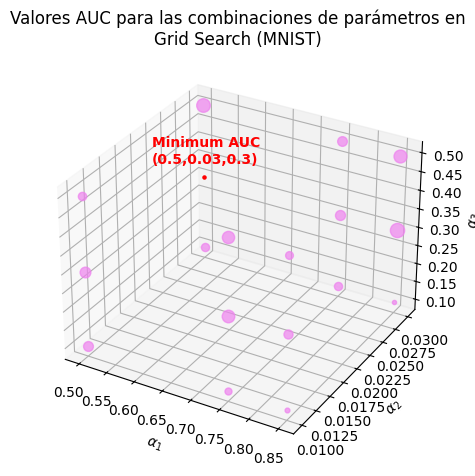

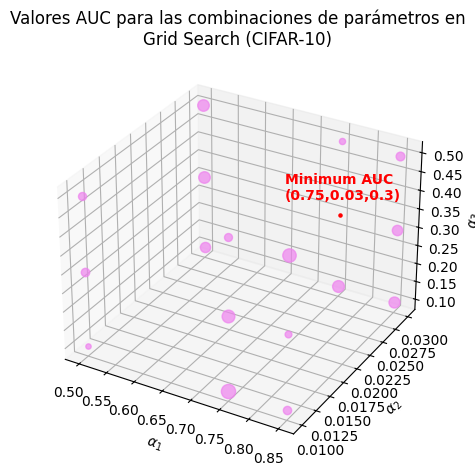

In [7]:
plot_grid_search(mnist_auc, title="Valores AUC para las combinaciones de parámetros en\nGrid Search (MNIST)", filename="grid_search_mnist.png")
plot_grid_search(cifar_auc, title="Valores AUC para las combinaciones de parámetros en\nGrid Search (CIFAR-10)", filename="grid_search_cifar.png")

## Curvas de aprendizaje de métodos basados en rendimiento

Cargar resultados experimentales de RandomSampling, AFL y GreedyFed.

In [8]:
random_results_path = Path.cwd() / "random"
active_results_path = Path.cwd() / "active"
greedy_results_path = Path.cwd() / "greedy"

# load csv data
random_dfs = (pd.read_csv(random_results_path / "rand_mnist_150.csv"),
	   		pd.read_csv(random_results_path / "rand_cifar_100.csv"))
active_dfs = (pd.read_csv(active_results_path / "active_mnist_150.csv"),
	   		pd.read_csv(active_results_path / "active_cifar_100.csv"))
greedy_dfs = (pd.read_csv(greedy_results_path / "greedy_mnist_150.csv"),
	   		pd.read_csv(greedy_results_path / "greedy_cifar_100.csv"))

plots_path = Path.cwd() / "plots"

Dibujar curvas de aprendizaje para cada método (en una sola figura) para MNIST y CIFAR-10.

In [9]:
LABELS = ("RandomSampling", "AFL", "GreedyFed")

def plot_accuracies(dfs, labels=LABELS, title="Result", filename=None, rr_rounds=None):
	with plt.style.context("ggplot"):
		fig = plt.figure()

		for df, label in zip(dfs, labels):
			plt.plot(df["accuracy"], linewidth=3, label=label, alpha=0.8)

		if rr_rounds:
			plt.axvline(x=rr_rounds, color='r', linestyle='--', linewidth=1, alpha=0.5)
		
		plt.xlabel("Rounds")
		plt.ylabel("Accuracy")
		plt.grid(True)
		plt.legend(loc='best')
		if filename:
			plt.savefig(plots_path / filename, dpi=200)
		plt.show()

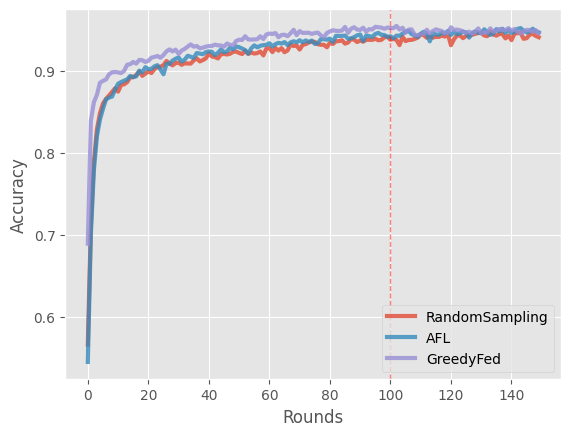

In [10]:
mnist_dfs = (random_dfs[0], active_dfs[0], greedy_dfs[0])
plot_accuracies(mnist_dfs, title="", filename="perf_mnist_curves.png", rr_rounds=100)

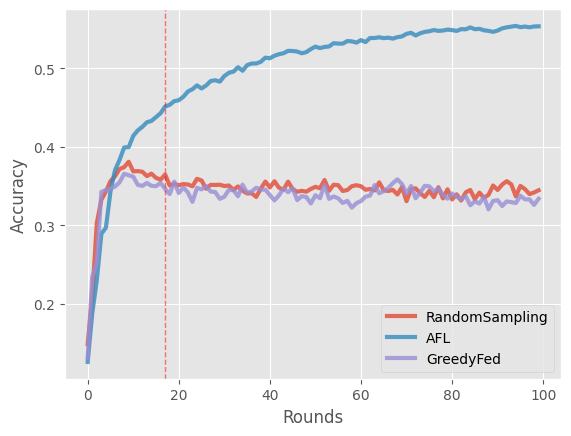

In [11]:
cifar_dfs = (random_dfs[1], active_dfs[1], greedy_dfs[1])
plot_accuracies(cifar_dfs, title="", filename="perf_cifar_curves.png", rr_rounds=17)

## Obtención de métricas de rendimiento

Obtener RoA@0.85 y RoA@0.9 para todos los métodos en MNIST; del mismo modo, RoA@0.3 y RoA@0.5 para CIFAR-10

In [12]:
def get_roa(df, acc):
	idx = df[df["accuracy"] >= acc].index

	if len(idx) > 0:
		return idx[0]
	return 'N/A'

# MNIST
df_random = random_dfs[0]
df_active = active_dfs[0]
df_greedy = greedy_dfs[0]

rand_roa_85 = get_roa(df_random, 0.85)
rand_roa_90 = get_roa(df_random, 0.9)

active_roa_85 = get_roa(df_active, 0.85)
active_roa_90 = get_roa(df_active, 0.9)

greedy_roa_85 = get_roa(df_greedy, 0.85)
greedy_roa_90 = get_roa(df_greedy, 0.9)

# CIFAR-10

df_random = random_dfs[1]
df_active = active_dfs[1]
df_greedy = greedy_dfs[1]

rand_roa_30 = get_roa(df_random, 0.3)
rand_roa_50 = get_roa(df_random, 0.5)

active_roa_30 = get_roa(df_active, 0.3)
active_roa_50 = get_roa(df_active, 0.5)

greedy_roa_30 = get_roa(df_greedy, 0.3)
greedy_roa_50 = get_roa(df_greedy, 0.5)

# make table
roa_mnist = {
	"RoA@0.85": [rand_roa_85, active_roa_85, greedy_roa_85],
	"RoA@0.9": [rand_roa_90, active_roa_90, greedy_roa_90],
}
roa_cifar = {
	"RoA@0.3": [rand_roa_30, active_roa_30, greedy_roa_30],
	"RoA@0.5": [rand_roa_50, active_roa_50, greedy_roa_50],
}

df_mnist = pd.DataFrame(roa_mnist, index=LABELS)
df_cifar = pd.DataFrame(roa_cifar, index=LABELS)

display(df_mnist)
display(df_cifar)

,RoA@0.85,RoA@0.9
RandomSampling,5,22
AFL,5,17
GreedyFed,2,13


,RoA@0.3,RoA@0.5
RandomSampling,2,N/A
AFL,5,33
GreedyFed,3,N/A


Obtener tiempos de entrenamiento por ronda medios y su desviación típica.

In [13]:
# MNIST
df_random = random_dfs[0]
df_active = active_dfs[0]
df_greedy = greedy_dfs[0]

rand_mean_elapsed = df_random.elapsed_time.mean()
active_mean_elapsed = df_active.elapsed_time.mean()
greedy_mean_elapsed = df_greedy.elapsed_time.mean()

rand_std_elapsed = df_random.elapsed_time.std()
active_std_elapsed = df_active.elapsed_time.std()
greedy_std_elapsed = df_greedy.elapsed_time.std()

elapsed_mnist = {
	"mean_elapsed_time": [rand_mean_elapsed, active_mean_elapsed, greedy_mean_elapsed],
	"std_elapsed_time": [rand_std_elapsed, active_std_elapsed, greedy_std_elapsed]
}

# CIFAR-10
df_random = random_dfs[1]
df_active = active_dfs[1]
df_greedy = greedy_dfs[1]

rand_mean_elapsed = df_random.elapsed_time.mean()
active_mean_elapsed = df_active.elapsed_time.mean()
greedy_mean_elapsed = df_greedy.elapsed_time.mean()

rand_std_elapsed = df_random.elapsed_time.std()
active_std_elapsed = df_active.elapsed_time.std()
greedy_std_elapsed = df_greedy.elapsed_time.std()

elapsed_cifar = {
	"mean_elapsed_time": [rand_mean_elapsed, active_mean_elapsed, greedy_mean_elapsed],
	"std_elapsed_time": [rand_std_elapsed, active_std_elapsed, greedy_std_elapsed]
}

# make tables
df_elapsed_mnist = pd.DataFrame(elapsed_mnist, index=LABELS)
df_elapsed_cifar = pd.DataFrame(elapsed_cifar, index=LABELS)

display(df_elapsed_mnist)
display(df_elapsed_cifar)

,mean_elapsed_time,std_elapsed_time
RandomSampling,2.551655,0.424647
AFL,3.131581,0.426151
GreedyFed,205.857491,79.268412


,mean_elapsed_time,std_elapsed_time
RandomSampling,6.975524,0.695715
AFL,7.168597,0.507022
GreedyFed,710.690126,419.278377


Obtener métrica al final del entrenamiento.

In [14]:

# MNIST
df_random = random_dfs[0]
df_active = active_dfs[0]
df_greedy = greedy_dfs[0]

rand_final_accuracy = df_random.accuracy.iloc[-1]
active_final_accuracy = df_active.accuracy.iloc[-1]
greedy_final_accuracy = df_greedy.accuracy.iloc[-1]

final_accuracy_mnist = {
	"accuracy": [rand_final_accuracy, active_final_accuracy, greedy_final_accuracy],
}

# CIFAR-10
df_random = random_dfs[1]
df_active = active_dfs[1]
df_greedy = greedy_dfs[1]

rand_final_accuracy = df_random.accuracy.iloc[-1]
active_final_accuracy = df_active.accuracy.iloc[-1]
greedy_final_accuracy = df_greedy.accuracy.iloc[-1]

final_accuracy_cifar = {
	"accuracy": [rand_final_accuracy, active_final_accuracy, greedy_final_accuracy],
}

# make tables
df_final_accuracy_mnist = pd.DataFrame(final_accuracy_mnist, index=LABELS)
df_final_accuracy_cifar = pd.DataFrame(final_accuracy_cifar, index=LABELS)

display(df_final_accuracy_mnist)
display(df_final_accuracy_cifar)

,accuracy
RandomSampling,0.9409
AFL,0.9469
GreedyFed,0.9463


,accuracy
RandomSampling,0.3446
AFL,0.5538
GreedyFed,0.3338


## Análisis resultados

Visualicemos el total de participaciones de los clientes en CIFAR-10 para AFL y GreedyFed.

In [15]:
from util import *

random_cifar_out_filename = random_results_path / "cifar_out.txt"
active_cifar_out_filename = active_results_path / "cifar_out.txt"
greedy_cifar_out_filename = greedy_results_path / "cifar_out.txt"

random_cifar_out_filename, active_cifar_out_filename, greedy_cifar_out_filename

(PosixPath('/home/cam/Classes/tfg/flex-cs/results/random/cifar_out.txt'),
 PosixPath('/home/cam/Classes/tfg/flex-cs/results/active/cifar_out.txt'),
 PosixPath('/home/cam/Classes/tfg/flex-cs/results/greedy/cifar_out.txt'))

In [16]:
K_mnist = 300
K_cifar = 100

# read file lines
random_cifar_out = read_file(random_cifar_out_filename)
active_cifar_out = read_file(active_cifar_out_filename)
greedy_cifar_out = read_file(greedy_cifar_out_filename)

# get selections
random_selections = clean_data(random_cifar_out)
active_selections = clean_data(active_cifar_out)
greedy_selections = clean_data(greedy_cifar_out)

# get count selections per client
random_nt = count_selections(random_selections)
active_nt = count_selections(active_selections)
greedy_nt = count_selections(greedy_selections)

# fill for clients that did not get selected
# For GreedyFed we fill with 1 (RR rounds) and AFL with 0
random_nt = fill_clients(random_nt, 0, K_cifar)
active_nt = fill_clients(active_nt, 0, K_cifar)
greedy_nt = fill_clients(greedy_nt, 1, K_cifar)

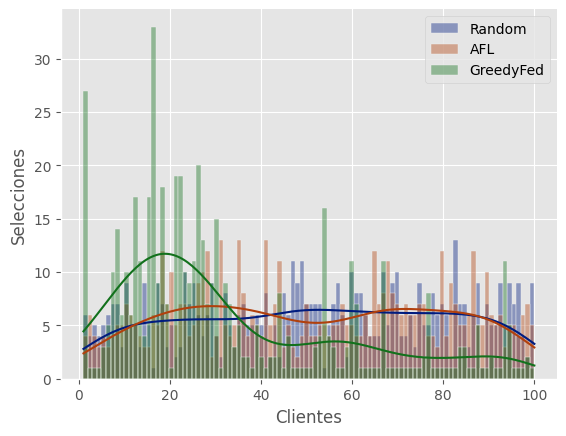

In [17]:
def plot_client_selections_comparison(sels: List[dict], labels: List[str], K: int, filename: str = None):
	bins = K

	with plt.style.context("ggplot"):
		f = plt.figure()
		Xs = []
		for sel in sels:
			Xs.append(np.array([key+1 for key, count in sel.items() for _ in range(count)]))

		# plot for each selection algorithm
		sns.set_palette("dark")
		for idx, x in enumerate(Xs):
			sns.histplot(x=x, bins=bins, kde=True, label=labels[idx], multiple='stack', alpha=0.4)

		sns.despine(f)
		plt.xlabel("Clientes")
		plt.ylabel("Selecciones")
		plt.legend()

		plt.grid(True)
		if filename:
			plt.savefig(plots_path / filename, dpi=200)
		plt.show()

plot_client_selections_comparison([random_nt, active_nt, greedy_nt], labels=("Random", "AFL", "GreedyFed"), K=K_cifar, filename="perf_selections_comparison_cifar.png")

Hacemos lo mismo para MNIST, cuyo caso GreedyFed obtuvo mejor convergencia.

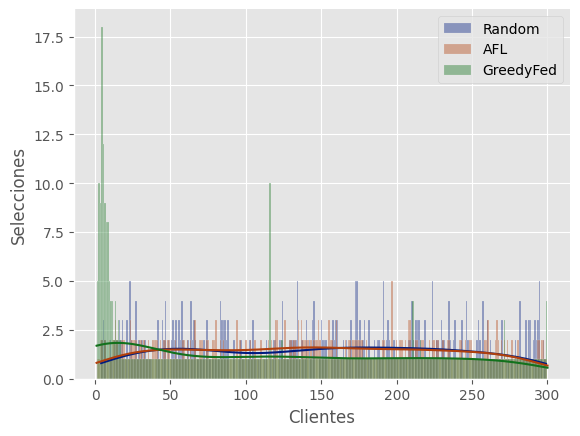

In [18]:
random_mnist_out_filename = random_results_path / "mnist_out.txt"
active_mnist_out_filename = active_results_path / "mnist_out.txt"
greedy_mnist_out_filename = greedy_results_path / "mnist_out.txt"

# read file lines
random_mnist_out = read_file(random_mnist_out_filename)
active_mnist_out = read_file(active_mnist_out_filename)
greedy_mnist_out = read_file(greedy_mnist_out_filename)

# get selections
random_selections = clean_data(random_mnist_out)
active_selections = clean_data(active_mnist_out)
greedy_selections = clean_data(greedy_mnist_out)

# get count selections per client
random_nt = count_selections(random_selections)
active_nt = count_selections(active_selections)
greedy_nt = count_selections(greedy_selections)

# fill for clients that did not get selected
# For GreedyFed we fill with 1 (RR rounds) and AFL with 0
random_nt = fill_clients(random_nt, 0, K_mnist)
active_nt = fill_clients(active_nt, 0, K_mnist)
greedy_nt = fill_clients(greedy_nt, 1, K_mnist)

plot_client_selections_comparison([random_nt, active_nt, greedy_nt], labels=("Random", "AFL", "GreedyFed"), K=K_mnist, filename="perf_selections_comparison_mnist.png")

Número de veces en que los valores de Shapley no han convergido para MNIST y CIFAR-10.

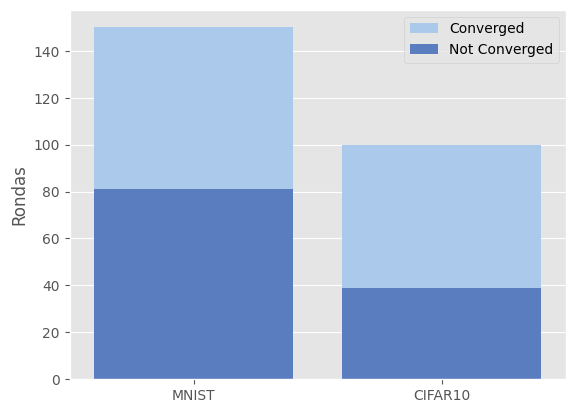

In [19]:
from util import *

with plt.style.context("ggplot"):
	T_cifar = 100
	T_mnist = 150

	not_converged_mnist = num_not_converged(greedy_mnist_out)
	not_converged_cifar = num_not_converged(greedy_cifar_out)

	# plot converged/non converged counts
	sns.set_color_codes("pastel")
	sns.barplot(x=("MNIST", "CIFAR10"), y=(T_mnist, T_cifar), label="Converged", color='b')

	sns.set_color_codes("muted")
	sns.barplot(x=("MNIST", "CIFAR10"), y=(not_converged_mnist, not_converged_cifar), label="Not Converged", color='b')

	plt.ylabel("Rondas")
	plt.legend(loc="best")
	plt.savefig(plots_path / "perf_conv_rounds_barplot.png", dpi=200)
	plt.show()

## Análisis de convergencia de los valores de Shapley

Marquemos las rondas donde han convergido los valores de Shapley.

In [20]:
def add_sv_convergence_flag(df: pd.DataFrame, output: str):
	rounds = list(filter(lambda line: "Running round" in line or "not converged" in line, output))

	# flag rounds in which GTG-Shapley converged
	not_conv_rounds = {}
	next_r = 1
	for i, r in enumerate(rounds):
		if i < len(rounds) - 1:
			if "Running round" in rounds[i] and "not converged" in rounds[i + 1]:
				not_conv_rounds[next_r] = True
				next_r += 1
			elif "Running round" in rounds[i] and not "not converged" in rounds[i + 1]:
				not_conv_rounds[next_r] = False
				next_r += 1

	# fill converged rounds
	not_conv_rounds = {k: not_conv_rounds.get(k, False) for k in range(1, len(df) + 1)}

	# add convergence flags as an extra column
	not_converged = list(not_conv_rounds.values())
	df["SV converged"] = ~pd.Series(not_converged)

	return df

In [21]:
df_mnist_conv = add_sv_convergence_flag(greedy_dfs[0], greedy_mnist_out)
df_cifar_conv = add_sv_convergence_flag(greedy_dfs[1], greedy_cifar_out)

df_mnist_conv, df_cifar_conv

(       loss  accuracy  elapsed_time  SV converged
 0    1.1876    0.6893     69.285824          True
 1    0.5984    0.8389     67.279822          True
 2    0.4716    0.8617     67.056356          True
 3    0.4594    0.8706     67.380652          True
 4    0.3997    0.8854     66.475385          True
 ..      ...       ...           ...           ...
 145  0.2843    0.9499    276.843812         False
 146  0.2678    0.9498    104.772992         False
 147  0.2833    0.9474    280.313208         False
 148  0.2967    0.9496    276.072528          True
 149  0.2938    0.9463    273.787440         False
 
 [150 rows x 4 columns],
         loss  accuracy  elapsed_time  SV converged
 0   2.293639    0.1303    157.105745          True
 1   2.213879    0.2339    153.787389          True
 2   2.134027    0.2528    154.760225          True
 3   2.021053    0.3425    156.188228          True
 4   1.956217    0.3449    159.460860          True
 ..       ...       ...           ...           .

Dibujemos la evolución del tiempo de entrenamiento por rondas y definamos la zona de convergencia sobre estos tiempos.

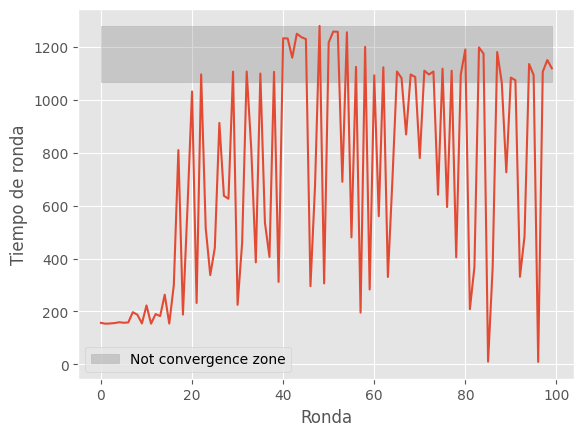

In [22]:
def plot_elapsed_times(df: pd.DataFrame, filename: str = None):
	with plt.style.context("ggplot"):
		df_not_conv_times = df[~df["SV converged"]]["elapsed_time"]
		sns.lineplot(df, x=np.arange(len(df)), y="elapsed_time")
		plt.fill_between(x=np.arange(len(df)), y1=df_not_conv_times.max(), y2=df_not_conv_times.min(), color='gray', alpha=0.3, label="Not convergence zone")
		
		# plot line pointing out not convergence zone
		plt.xlabel("Ronda")
		plt.ylabel("Tiempo de ronda")
		plt.legend()
		plt.grid(True)
		if filename:
			plt.savefig(plots_path / filename, dpi=200)
		plt.show()

plot_elapsed_times(df_cifar_conv, "perf_round_times_cifar.png")

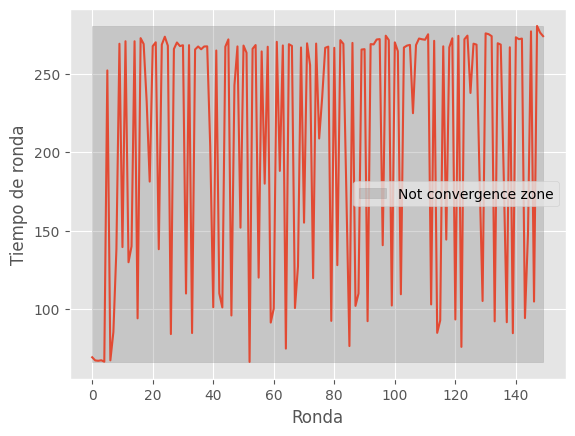

In [23]:
plot_elapsed_times(df_mnist_conv, "perf_round_times_mnist.png")

### Comparativa AFL y RandomSampling

In [24]:
K_mnist = 300
K_cifar = 100

# read file lines
random_cifar_out = read_file(random_cifar_out_filename)
active_cifar_out = read_file(active_cifar_out_filename)

# get selections
random_selections = clean_data(random_cifar_out)
active_selections = clean_data(active_cifar_out)

# get count selections per client
random_nt = count_selections(random_selections)
active_nt = count_selections(active_selections)

# fill for clients that did not get selected
# For GreedyFed we fill with 1 (RR rounds) and AFL with 0
random_nt = fill_clients(random_nt, 0, K_cifar)
active_nt = fill_clients(active_nt, 0, K_cifar)

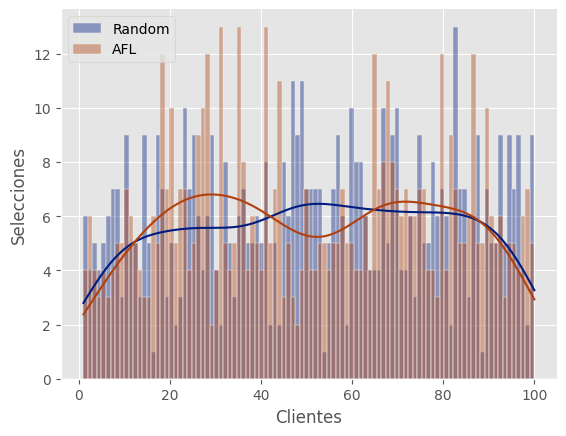

In [25]:
plot_client_selections_comparison([random_nt, active_nt], labels=("Random", "AFL"), K=K_cifar, filename="perf_random_afl_selec_comparison.png")